# Comprehensive Comparision

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import Pipeline

In [123]:
df = pd.read_csv('dataset_comb.csv')
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,Gonen
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,Gonen
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,Gonen
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,Gonen


In [4]:
df['Class'].value_counts()

jasmine    9985
Gonen      8200
Name: Class, dtype: int64

In [5]:
df.values.shape

(18185, 12)

In [6]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [50]:
X = df.values[:,:-1]
Y = df.values[:,-1]

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

### Fisher Linear Discriminant 

In [235]:
#pipe = Pipeline([('scaler', MinMaxScaler()), ('fda', LinearDiscriminantAnalysis())])
fda_scores = cross_validate(LinearDiscriminantAnalysis(),X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(fda_scores['test_score'],fda_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)
    
print("\nAverage test accuracy= ",np.average(fda_scores['test_score']),"\n")

fda_prec = cross_validate(LinearDiscriminantAnalysis(),X,Y,cv=7,scoring='precision')
for i,score in enumerate(fda_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
fda_rec = cross_validate(LinearDiscriminantAnalysis(),X,Y,cv=7,scoring='recall')
for i,score in enumerate(fda_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.9318706697459584  Training Accuracy =  1.0
Fold  2
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  3
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  4
Testing Accuracy =  1.0  Training Accuracy =  0.9998716879450824
Fold  5
Testing Accuracy =  1.0  Training Accuracy =  0.9998716879450824
Fold  6
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  7
Testing Accuracy =  1.0  Training Accuracy =  0.999871696176546

Average test accuracy=  0.9902672385351369 

Precision over fold  1  =  1.0
Precision over fold  2  =  1.0
Precision over fold  3  =  1.0
Precision over fold  4  =  1.0
Precision over fold  5  =  1.0
Precision over fold  6  =  1.0
Precision over fold  7  =  1.0


Recall over fold  1  =  0.8759635599159075
Recall over fold  2  =  1.0
Recall over fold  3  =  1.0
Recall over fold  4  =  1.0
Recall over fold  5  =  1.0
Recall over fold  6  =  1.0
Recall over fold  7  =  1.0


### Linear Perceptron 

In [236]:
pipeLP = Pipeline([('scaler', StandardScaler()), ('per', Perceptron())])  #or use MinMaxScaler
per_scores = cross_validate(pipeLP,X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(per_scores['test_score'],per_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

print("\nAverage test accuracy= ",np.average(per_scores['test_score']),"\n")

per_prec = cross_validate(pipeLP,X,Y,cv=7,scoring='precision')
for i,score in enumerate(per_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
per_rec = cross_validate(pipeLP,X,Y,cv=7,scoring='recall')
for i,score in enumerate(per_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.941108545034642  Training Accuracy =  1.0
Fold  2
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  3
Testing Accuracy =  1.0  Training Accuracy =  0.9998716879450824
Fold  4
Testing Accuracy =  1.0  Training Accuracy =  1.0
Fold  5
Testing Accuracy =  1.0  Training Accuracy =  0.9989093475332007
Fold  6
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  7
Testing Accuracy =  0.9988448209472468  Training Accuracy =  0.9999358480882731

Average test accuracy=  0.9914219094259842 

Precision over fold  1  =  1.0
Precision over fold  2  =  1.0
Precision over fold  3  =  1.0
Precision over fold  4  =  1.0
Precision over fold  5  =  1.0
Precision over fold  6  =  1.0
Precision over fold  7  =  0.9979006298110566


Recall over fold  1  =  0.8927820602662929
Recall over fold  2  =  1.0
Recall over fold  3  =  1.0
Recall over fold  4  =  1.0
Recall over fold  5  =  1.0
Recall over fold  6  =  1.0
Recall over fold  7  =  1.0

### Naive Bayes 

In [240]:
#pipe = Pipeline([('scaler', StandardScaler()), ('nb', GaussianNB())]) #scaling not required i think
nb_scores = cross_validate(GaussianNB(),X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(nb_scores['test_score'],nb_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

print("\nAverage test accuracy= ",np.average(nb_scores['test_score']),"\n")

nb_prec = cross_validate(GaussianNB(),X,Y,cv=7,scoring='precision')
for i,score in enumerate(nb_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
nb_rec = cross_validate(GaussianNB(),X,Y,cv=7,scoring='recall')
for i,score in enumerate(nb_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.9491916859122402  Training Accuracy =  0.9858215179316097
Fold  2
Testing Accuracy =  0.9865280985373364  Training Accuracy =  0.9797266953230256
Fold  3
Testing Accuracy =  0.9911470361816782  Training Accuracy =  0.9776095464168859
Fold  4
Testing Accuracy =  0.9923017705927637  Training Accuracy =  0.9774170783345095
Fold  5
Testing Accuracy =  0.9888375673595073  Training Accuracy =  0.9782511066914736
Fold  6
Testing Accuracy =  0.9888375673595073  Training Accuracy =  0.9797266953230256
Fold  7
Testing Accuracy =  0.9626492106276473  Training Accuracy =  0.9879394405953298

Average test accuracy=  0.9799275623672401 

Precision over fold  1  =  0.9153303399615138
Precision over fold  2  =  0.9760601915184679
Precision over fold  3  =  0.9841379310344828
Precision over fold  4  =  0.9861687413554634
Precision over fold  5  =  0.9800687285223367
Precision over fold  6  =  0.9800687285223367
Precision over fold  7  =  0.9363099146421536


Recall over fo

### Logistic Regression 

In [241]:
pipeLR = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(solver='liblinear'))])
lr_scores = cross_validate(pipeLR,X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(lr_scores['test_score'],lr_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

print("\nAverage test accuracy= ",np.average(lr_scores['test_score']),"\n")

lr_prec = cross_validate(pipeLR,X,Y,cv=7,scoring='precision')
for i,score in enumerate(lr_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
lr_rec = cross_validate(pipeLR,X,Y,cv=7,scoring='recall')
for i,score in enumerate(lr_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.9541955350269438  Training Accuracy =  1.0
Fold  2
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  3
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  4
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  5
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  6
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  7
Testing Accuracy =  1.0  Training Accuracy =  0.9999358480882731

Average test accuracy=  0.9934565050038492 

Precision over fold  1  =  1.0
Precision over fold  2  =  1.0
Precision over fold  3  =  1.0
Precision over fold  4  =  1.0
Precision over fold  5  =  1.0
Precision over fold  6  =  1.0
Precision over fold  7  =  1.0


Recall over fold  1  =  0.9166082690960056
Recall over fold  2  =  1.0
Recall over fold  3  =  1.0
Recall over fold  4  =  1.0
Recall over fold  5  =  1.0
Recall over fold  6  =  1.0
Recall over fold  7  =  1.0


### Artificial Neural Network 

In [242]:
pipeNN = Pipeline([('scaler', StandardScaler()), ('ann', MLPClassifier())])
nn_scores = cross_validate(pipeNN,X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(nn_scores['test_score'],nn_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

print("\nAverage test accuracy= ",np.average(nn_scores['test_score']),"\n")

nn_prec = cross_validate(pipeNN,X,Y,cv=7,scoring='precision')
for i,score in enumerate(nn_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
nn_rec = cross_validate(pipeNN,X,Y,cv=7,scoring='recall')
for i,score in enumerate(nn_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.9087759815242494  Training Accuracy =  1.0
Fold  2
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  3
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  4
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  5
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  6
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  7
Testing Accuracy =  0.9953792837889873  Training Accuracy =  0.9999358480882731

Average test accuracy=  0.986307895044748 

Precision over fold  1  =  1.0
Precision over fold  2  =  1.0
Precision over fold  3  =  1.0
Precision over fold  4  =  1.0
Precision over fold  5  =  1.0
Precision over fold  6  =  1.0
Precision over fold  7  =  0.9916550764951322


Recall over fold  1  =  0.831114225648213
Recall over fold  2  =  1.0
Recall over fold  3  =  1.0
Recall over fold  4  =  1.0
Recall over fold  5  =  1.0
Recall over fold  6  =  1.0
Recall over f

### SVM 

In [243]:
pipesvm = Pipeline([('scaler', StandardScaler()), ('svm', SVC(kernel='rbf'))])  #kernel can linear or rbf or... (linear gives highest accuracy)
svm_scores = cross_validate(pipesvm,X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(svm_scores['test_score'],svm_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

print("\nAverage test accuracy= ",np.average(svm_scores['test_score']),"\n")

svm_prec = cross_validate(pipesvm,X,Y,cv=7,scoring='precision')
for i,score in enumerate(svm_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
svm_rec = cross_validate(pipesvm,X,Y,cv=7,scoring='recall')
for i,score in enumerate(svm_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.9599692070823711  Training Accuracy =  1.0
Fold  2
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  3
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  4
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  5
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  6
Testing Accuracy =  1.0  Training Accuracy =  0.9999358439725412
Fold  7
Testing Accuracy =  0.9942241047362341  Training Accuracy =  0.9999358480882731

Average test accuracy=  0.9934561874026578 

Precision over fold  1  =  0.9596942321056289
Precision over fold  2  =  1.0
Precision over fold  3  =  1.0
Precision over fold  4  =  1.0
Precision over fold  5  =  1.0
Precision over fold  6  =  1.0
Precision over fold  7  =  0.9895905621096461


Recall over fold  1  =  0.9677645409950946
Recall over fold  2  =  1.0
Recall over fold  3  =  1.0
Recall over fold  4  =  1.0
Recall over fold  5  =  1.0
Recall over fold  6  =  

### Testing Accuracies

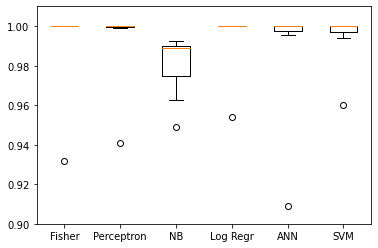

In [249]:
fig, ax = plot.subplots()
ax.boxplot([fda_scores['test_score'],per_scores['test_score'],nb_scores['test_score'],lr_scores['test_score'],nn_scores['test_score'],svm_scores['test_score']])
ax.set_xticklabels(['Fisher','Perceptron','NB','Log Regr','ANN','SVM'])
plot.ylim([0.9,1.01])
plot.show()


### Training Accuracies 

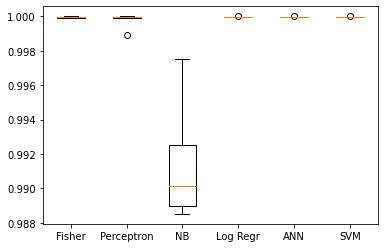

In [161]:
fig, ax = plot.subplots()
ax.boxplot([fda_scores['train_score'],per_scores['train_score'],nb_scores['train_score'],lr_scores['train_score'],nn_scores['train_score'],svm_scores['train_score']])
ax.set_xticklabels(['Fisher','Perceptron','NB','Log Regr','ANN','SVM'])
plot.show()